## Effect of batch size notebook

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.parser import Parser

In [15]:
series = 5
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,5-paper-video,resnet-human,resnet18,16,60Gi,1,1,20,60,10,checking the effect of batch size under 20 and...,1
1,2,5-paper-video,resnet-human,resnet18,16,60Gi,1,1,20,60,10,checking the effect of batch size under 20 and...,1
2,3,5-paper-video,resnet-human,resnet18,16,60Gi,2,1,20,60,10,checking the effect of batch size under 20 and...,1
3,4,5-paper-video,resnet-human,resnet18,16,60Gi,2,1,20,60,10,checking the effect of batch size under 20 and...,1
4,5,5-paper-video,resnet-human,resnet18,16,60Gi,4,1,20,60,10,checking the effect of batch size under 20 and...,1
5,6,5-paper-video,resnet-human,resnet18,16,60Gi,4,1,20,60,10,checking the effect of batch size under 20 and...,1
6,7,5-paper-video,resnet-human,resnet18,16,60Gi,8,1,20,60,10,checking the effect of batch size under 20 and...,1
7,8,5-paper-video,resnet-human,resnet18,16,60Gi,8,1,20,60,10,checking the effect of batch size under 20 and...,1
8,9,5-paper-video,resnet-human,resnet18,16,60Gi,16,1,20,60,10,checking the effect of batch size under 20 and...,1
9,10,5-paper-video,resnet-human,resnet18,16,60Gi,16,1,20,60,10,checking the effect of batch size under 20 and...,1


In [16]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['16'],
    'data_type': 'text',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': ['resnet18', 'resnet50', 'resnet152'],
    'node_name': 'resnet-human',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 5,
    'series_meta': 'checking the effect of batch size under 20 and 40 arrival '
                   'rates,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ '
                   '2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [20]},
    'workload_type': 'static'}


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,0.194971,2585.147045,0.078587
1,resnet18,1,0.174976,3657.631504,0.077783
2,resnet18,2,0.231545,242.980053,0.143327
3,resnet18,2,0.271106,1096.512540,0.159352
4,resnet18,4,0.484253,257.659938,0.322227
5,resnet18,4,0.469256,996.517159,0.293366
6,resnet18,8,0.790390,202.529734,0.551075
7,resnet18,8,0.701004,899.736404,0.510728
8,resnet18,16,1.580542,220.988954,1.090687
9,resnet18,16,1.558712,934.404034,1.006124


Text(0, 0.5, 'Latency (seconds)')

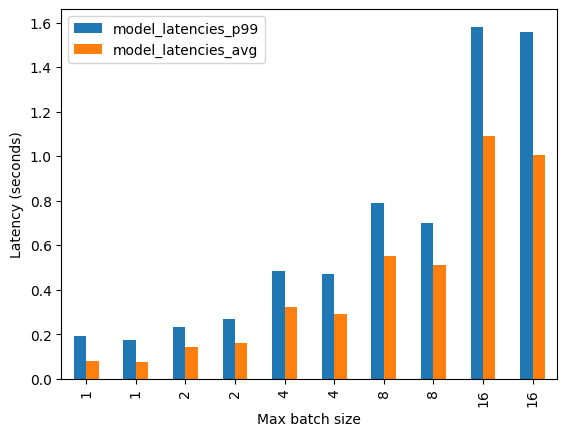

In [17]:
model_vairant = 'resnet18'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_vairant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet50,1,0.266413,543.314881,0.110404
1,resnet50,1,0.229184,2227.634486,0.105021
2,resnet50,2,0.313481,410.764654,0.173359
3,resnet50,2,0.352189,1692.248069,0.180013
4,resnet50,4,0.496780,415.284217,0.348686
5,resnet50,4,0.550330,1524.129070,0.364142
6,resnet50,8,0.874362,390.522119,0.643674
7,resnet50,8,0.965798,1494.870034,0.690472
8,resnet50,16,1.969377,468.580518,1.265904
9,resnet50,16,1.957153,1662.636559,1.281836


Text(0, 0.5, 'Latency (seconds)')

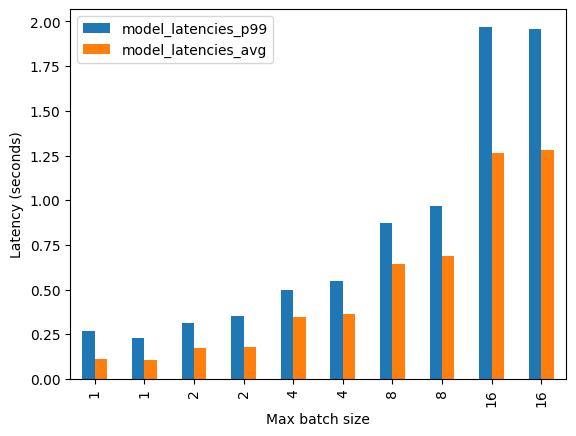

In [18]:
model_vairant = 'resnet50'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_vairant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

Text(0, 0.5, 'Latency (seconds)')

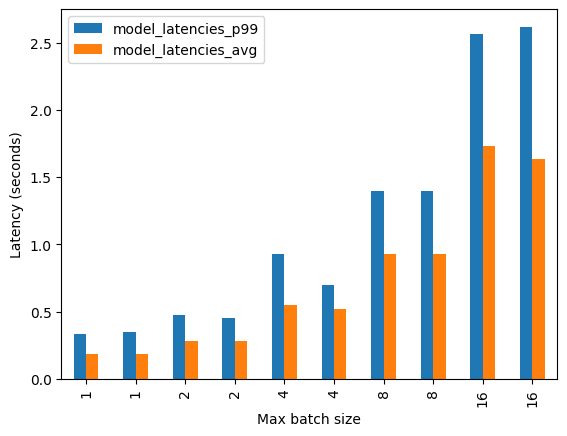

In [19]:
model_vairant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_vairant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,16,60Gi,0.231545,242.980053,0.143327
1,resnet18,16,60Gi,0.271106,1096.512540,0.159352
2,resnet50,16,60Gi,0.313481,410.764654,0.173359
3,resnet50,16,60Gi,0.352189,1692.248069,0.180013
4,resnet152,16,60Gi,0.472719,963.897738,0.280235
5,resnet152,16,60Gi,0.453809,3250.044109,0.280464


Text(0, 0.5, 'Latency (seconds)')

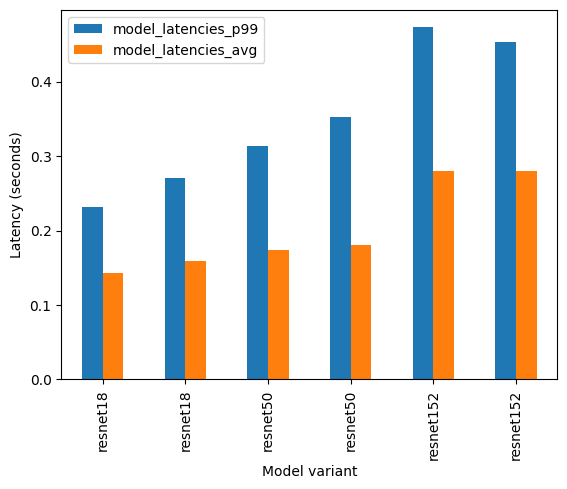

In [20]:
max_batch_size = 2
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == max_batch_size]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")

,model_variant,memory_usage_max
0,resnet18,7.861617e+08
1,resnet18,7.869850e+08
2,resnet50,1.033110e+09
3,resnet50,1.036169e+09
4,resnet152,1.612673e+09
5,resnet152,1.613787e+09


Text(0, 0.5, 'Memory Usage (Mb)')

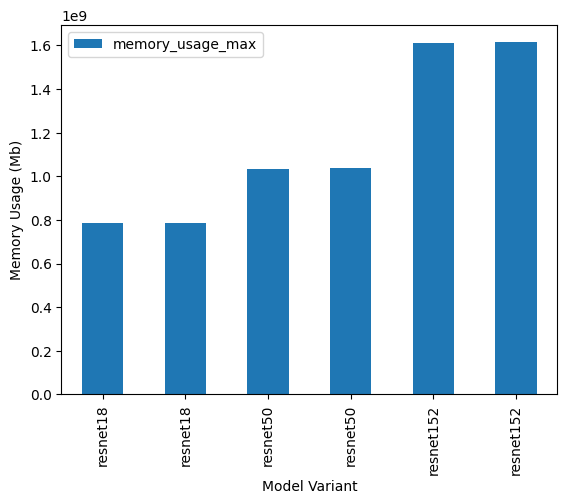

In [21]:
max_batch_size = 1
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == max_batch_size]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['memory_usage_max'])
ax.set_xlabel("Model Variant")
ax.set_ylabel("Memory Usage (Mb)")

,model_variant,memory_usage_max
0,resnet18,9.991004e+08
1,resnet18,1.001144e+09
2,resnet50,1.761178e+09
3,resnet50,1.747411e+09
4,resnet152,3.150729e+09
5,resnet152,3.135807e+09


Text(0, 0.5, 'Memory Usage (Mb)')

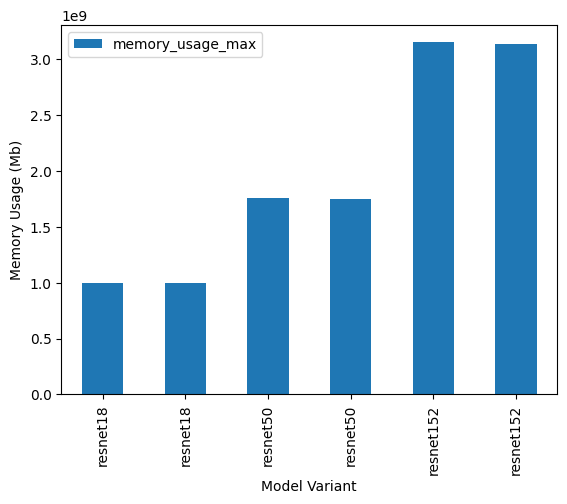

In [22]:
max_batch_size = 8
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == max_batch_size]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['memory_usage_max'])
ax.set_xlabel("Model Variant")
ax.set_ylabel("Memory Usage (Mb)")

,max_batch_size,memory_usage_max
0,1,1.612673e+09
1,1,1.613787e+09
2,2,1.809355e+09
3,2,1.809375e+09
4,4,2.236232e+09
5,4,2.239484e+09
6,8,3.150729e+09
7,8,3.135807e+09
8,16,4.652777e+09
9,16,4.662489e+09


Text(0, 0.5, 'Memory Usage (Mb)')

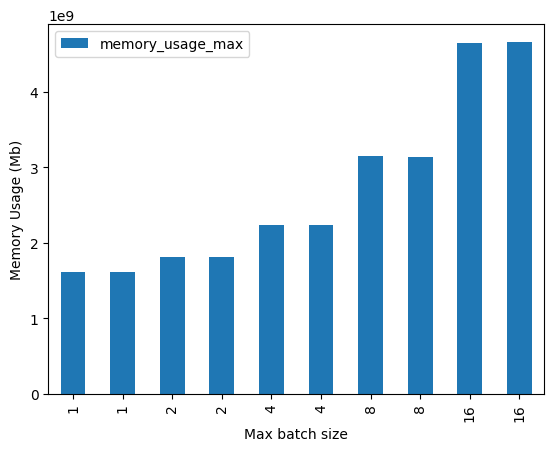

In [23]:
model_vairant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_vairant]['experiment_id'].tolist()
metadata_columns = ['max_batch_size']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['memory_usage_max'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Memory Usage (Mb)")

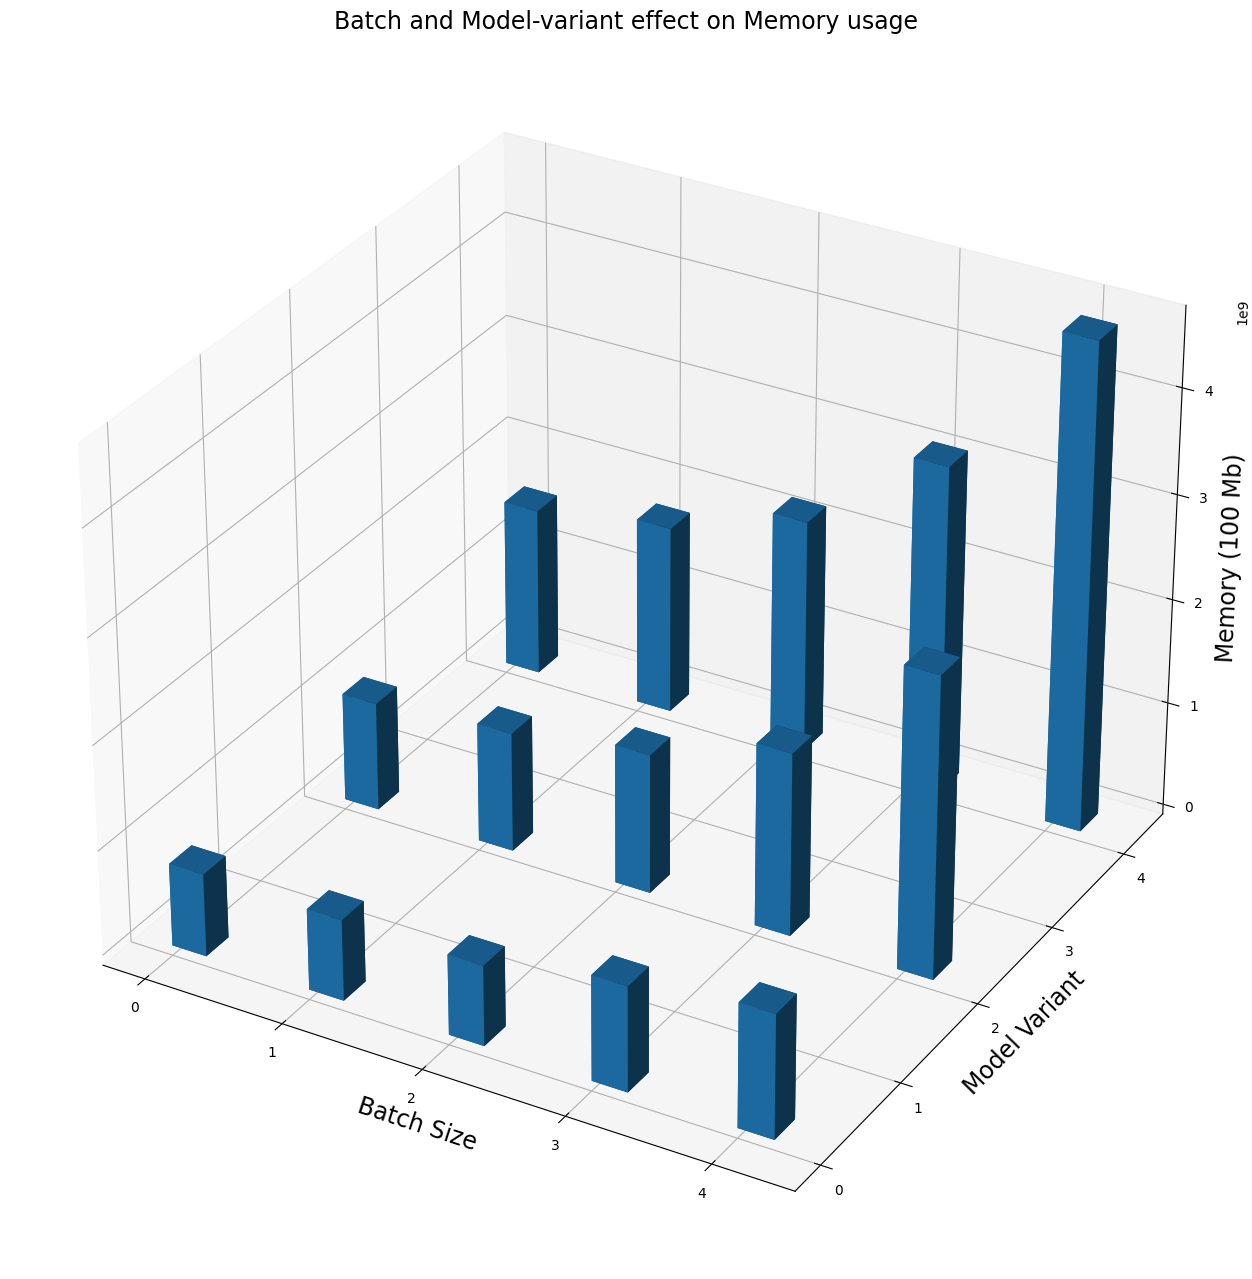

In [49]:
from ipaddress import collapse_addresses
import numpy as np
import matplotlib.pyplot as plt

# model_vairant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['experiment_id'] % 2 == 0]['experiment_id'].tolist()
metadata_columns = ['max_batch_size']
results_columns = ['memory_usage_max', 'model_variant']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)

# ax = output.plot.bar(x='max_batch_size', y=['memory_usage_max'])
# ax.set_xlabel("Max batch size")
# ax.set_ylabel("Memory Usage (Mb)")
# experiment_ids

output['model_variant_num'] = output['model_variant'].replace({
    'resnet18': 0,
    'resnet50': 2,
    'resnet152': 4
})

output['max_batch_size_num'] = output['max_batch_size'].replace({
    1: 0,
    2: 1,
    4: 2,
    8: 3,
    16: 4,
})

# display(output)

# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(111, projection='3d')

dx = 0.25
dy = 0.25

# colors = ['skyblue', 'g', 'r', 'pink', 'coral']

x = output['max_batch_size_num']
y = output['model_variant_num']
top = output['memory_usage_max']
z = np.zeros_like(top)

ax1.bar3d(x, y, z, dx, dy, top, shade=True)
ax1.set_title('Batch and Model-variant effect on Memory usage', size=17)
ax1.set_xlabel('Batch Size', size=17)
ax1.set_ylabel('Model Variant', size=17)
ax1.set_zlabel('Memory (100 Mb)', size=17)
# ax1.set_yticklabels(['resnet18', 'resnet50', 'resnet152'])
# ax1.set_ylim(0, 1)
# experiment_ids
# ax1.view_init(120, 120)


plt.show()

Text(0, 0.5, 'Latency (seconds)')

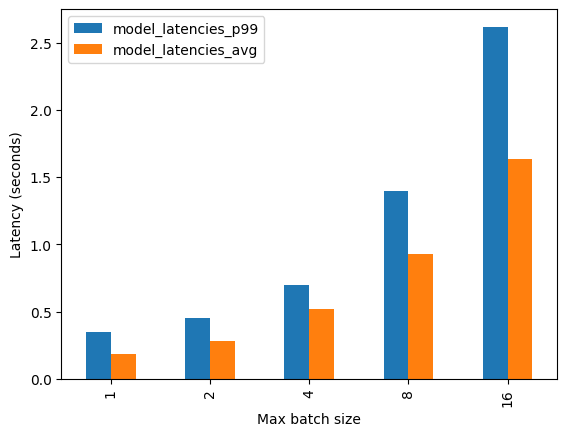

In [26]:
model_vairant = 'resnet152'
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_vairant) &
    (key_config_df['experiment_id'] % 2 == 0)]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,16,60Gi,0.271106,1096.512540,0.159352
1,resnet50,16,60Gi,0.352189,1692.248069,0.180013
2,resnet152,16,60Gi,0.453809,3250.044109,0.280464


Text(0, 0.5, 'Latency (seconds)')

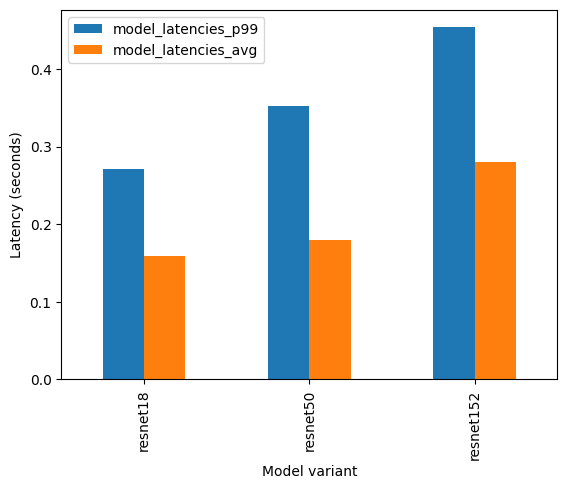

In [28]:
max_batch_size = 2
experiment_ids = key_config_df[
    (key_config_df['max_batch_size'] == max_batch_size) &
    (key_config_df['experiment_id'] % 2 == 0)]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")

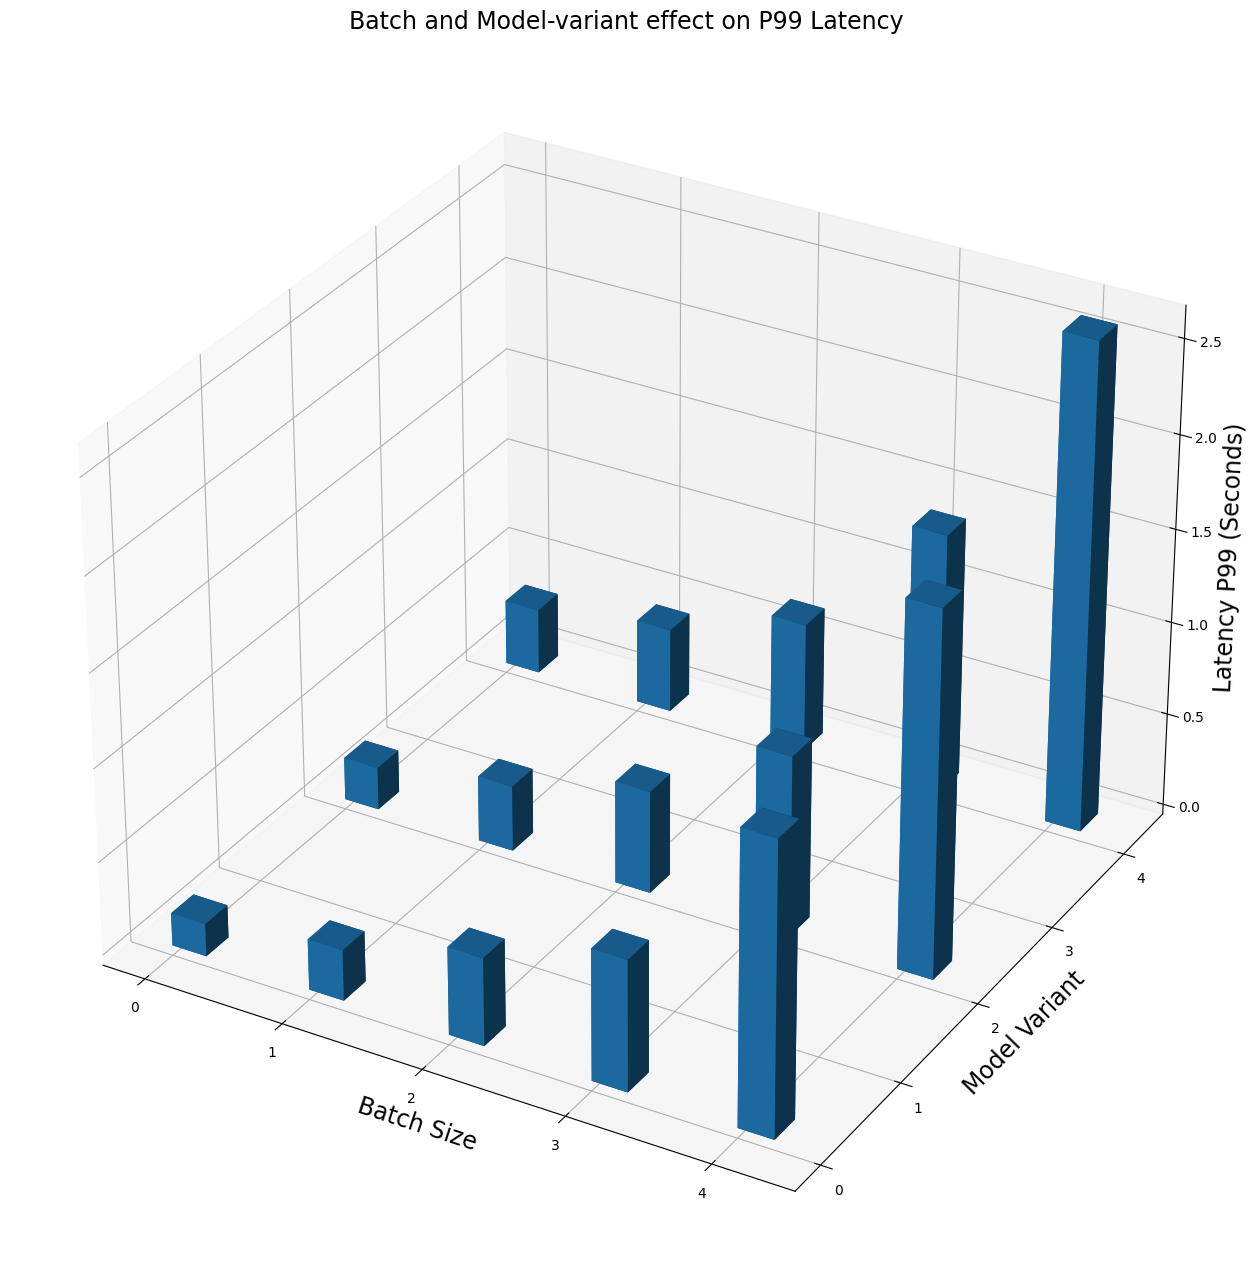

In [50]:
from ipaddress import collapse_addresses
import numpy as np
import matplotlib.pyplot as plt

# model_vairant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['experiment_id'] % 2 == 0]['experiment_id'].tolist()
metadata_columns = ['max_batch_size']
results_columns = ['model_latencies_p99', 'model_variant']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)

output['model_variant_num'] = output['model_variant'].replace({
    'resnet18': 0,
    'resnet50': 2,
    'resnet152': 4
})

output['max_batch_size_num'] = output['max_batch_size'].replace({
    1: 0,
    2: 1,
    4: 2,
    8: 3,
    16: 4,
})

# display(output)

# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(111, projection='3d')

dx = 0.25
dy = 0.25

# colors = ['skyblue', 'g', 'r', 'pink', 'coral']

x = output['max_batch_size_num']
y = output['model_variant_num']
top = output['model_latencies_p99']
z = np.zeros_like(top)

ax1.bar3d(x, y, z, dx, dy, top, shade=True)
ax1.set_title('Batch and Model-variant effect on P99 Latency', size=17)
ax1.set_xlabel('Batch Size', size=17)
ax1.set_ylabel('Model Variant', size=17)
ax1.set_zlabel('Latency P99 (Seconds)', size=17)
# ax1.set_yticklabels(['resnet18', 'resnet50', 'resnet152'])
# ax1.set_ylim(0, 1)
# experiment_ids
# ax1.view_init(120, 120)


plt.show()